<a href="https://colab.research.google.com/github/1dgog/TC3006C_portafolio_m2/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive
'Colab Notebooks'	 iris.data	     test.csv
 Conferencias		 iris.names	     train.csv
'Documentos utiles'	 LiFE		     Valhalla23.csv
 EBSCO			'Plan de estudios'   wine.data
 EGSGLP			 Portugues	     wine.names
 Fotos			'Servicio Social'
 gender_submission.csv	'Sin ordenar'


Se importan las librerias

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as sk_lm

In [16]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Se importan los datasets

In [17]:
columns = ["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df_train = pd.read_csv('train.csv',names = columns)
df_train = df_train.iloc[1: , :]
df_train.head
df_train.shape
columns = ["PassengerId","Survived"]
df_gender = pd.read_csv('gender_submission.csv',names = columns)
df_gender = df_gender.iloc[1: , :]
df_gender.head
df_gender.shape
columns = ["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
df_test = pd.read_csv('test.csv',names = columns)
df_test = df_test.iloc[1: , :]
df_test.head
df_test.shape
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


¿Cuantos NaNs hay?

In [18]:
x = {}
for ii in df_train:
  x[ii] = df_train[ii].isnull().sum().sum()
print(x)

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


De esto se interpreta que no es apropiado eliminar los renglones con NaNs en su totalidad, puesto que la columna Fare tiene 687 datos Null, y por ende el número total de datos bajaría de eliminar estos renglones. Por lo anterior, se aplica drop a la columna Fare, pues no presenta relevancia.

In [19]:
df_train = df_train.drop(columns = "Cabin")

In [20]:
df_train = df_train.dropna()

([], <a list of 0 Text major ticklabel objects>)

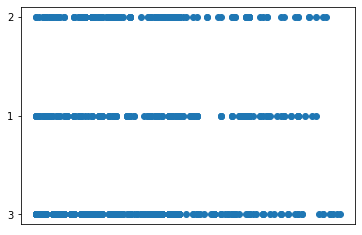

In [21]:
plt.scatter(df_train["Age"],df_train["Pclass"])
plt.xticks(range(100, 5))

De este histograma se encuentra que se tiene un ligero sesgo hacia la derecha.

(array([125., 102., 117.,  76., 132.,  31.,  43.,  44.,  29.,  13.]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <a list of 10 Patch objects>)

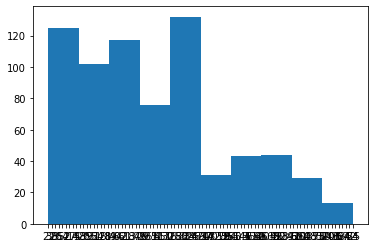

In [23]:
plt.hist(df_train["Age"])

([<matplotlib.patches.Wedge at 0x7f19bdd8fc10>,
 [Text(1.1, 0.0, ''),
  Text(1.0999345554991897, 0.011998900732995841, ''),
  Text(1.099411046215227, 0.0359909913720118, ''),
  Text(1.0983642768093713, 0.05996595224814501, ''),
  Text(1.0976448155273815, 0.07194344268841218, ''),
  Text(1.0976448155273815, 0.07194344268841218, ''),
  Text(1.0976448155273815, 0.07194344268841218, ''),
  Text(1.0967947454871745, 0.08391237257832787, ''),
  Text(1.0947031992605516, 0.10781885516324723, ''),
  Text(1.0920906335922433, 0.13167402181179383, ''),
  Text(1.0889582919220302, 0.15546651875646525, ''),
  Text(1.087197661324138, 0.16733572604594923, ''),
  Text(1.087197661324138, 0.16733572604594923, ''),
  Text(1.087197661324138, 0.16733572604594923, ''),
  Text(1.0853076650749227, 0.17918502205714446, ''),
  Text(1.083288528065041, 0.19101299684230105, ''),
  Text(1.083288528065041, 0.19101299684230105, ''),
  Text(1.083288528065041, 0.19101299684230105, ''),
  Text(1.0811404905516087, 0.2028182

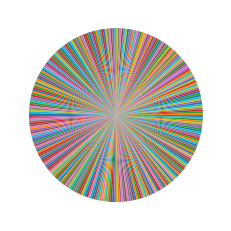

In [33]:
plt.pie(df_train["Survived"])

In [32]:
df_train["Survived"]

1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 712, dtype: object